In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import os

from numba import jit
import numpy
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

data_abb = pd.read_csv('ABB_ML_ready.csv')
data_abb.head()

,Unnamed: 0,price,minimum_nights,availability_365,number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,225,10,1,48,0,0,1,0,0,1,0,0,0
1,1,89,1,1,295,0,1,0,0,0,1,0,0,0
2,2,200,3,19,78,0,0,1,0,0,1,0,0,0
3,3,60,29,365,49,0,1,0,0,0,0,0,1,0
4,4,79,2,242,454,0,0,1,0,0,0,0,1,0


In [2]:
 test_score = []
def get_r_squared(max_neighbors=7, samples=100):
    train_score = []
   
    models = []
    inputs, values = make_regression(n_samples=samples)
    X_train, X_test, y_train, y_test = train_test_split(inputs, values)

    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models


([1.0,
  0.6689908812228536,
  0.5344682890911038,
  0.5069189505754775,
  0.4764949725938501,
  0.3816614880491337,
  0.3562897857086659,
  0.3492974535415849,
  0.3336461817532813,
  0.3292227074905174,
  0.31384343425119354,
  0.317621344675459,
  0.2991207722027013,
  0.27261816488198876,
  0.26534333540745825,
  0.23934775880292114,
  0.23537899727606337,
  0.21275452736065206,
  0.19984570232790422,
  0.18912700800319282],
 [-0.04014336936380558,
  0.025542264359541766,
  0.09336689717347901,
  0.20383782249484395,
  0.20263732893220276,
  0.22550473725417186,
  0.22552688923816822,
  0.24790642201793078,
  0.21741340276541232,
  0.2294767444800897,
  0.21298695698487569,
  0.19064552161792458,
  0.18907887665023326,
  0.2146743032770575,
  0.20375686638279178,
  0.20178974652105686,
  0.20737383243475238,
  0.19658090944060724,
  0.20054161605844245,
  0.19290878854386861],
 [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_par

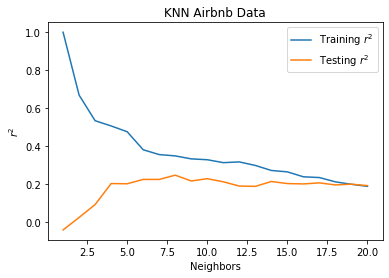

In [3]:
def plot_r_squared(neighbors=20, samples=100):
    train_score, test_score, models = get_r_squared(neighbors, samples)
    neighbors = range(1, neighbors+1)
    pyplot.plot(neighbors, train_score, label="Training $r^2$")
    pyplot.plot(neighbors, test_score, label="Testing $r^2$")
    pyplot.xlabel("Neighbors")
    pyplot.ylabel("$r^2$")
    pyplot.title("KNN Airbnb Data")
    pyplot.legend()
    return train_score, test_score, models
plot_r_squared()

In [4]:
print("Max r2: {:.2f}".format(max(test_score)))

Max r2: 0.25


In [11]:
X = data_abb.drop('price', axis=1)

y = data_abb['price']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.225
